<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [1]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# 독립 변수, 종속 변수 지정
house_column = house.columns.to_list()
X = house[house_column[0:13]]
y = house[house_column[-1]]
# 정규화(Category 변수인 CHAS와 RAD 제외 후 전체 독립변수 dataset에 대해 Scaling 진행.)
scaler=StandardScaler() 
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
house[scale_columns]=scaler.fit_transform(house[scale_columns])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,1,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,2,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,2,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,3,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,3,-1.106115,0.113032,0.441052,-1.026501,36.2


In [4]:
# alpha 값에 따른 계수 변화(Ridge)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    print(ridge.intercept_)
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

36.451323162743805
36.37832368347343
35.693653711659046
31.597669818274014
27.467884964141202


,0.001,0.010,0.100,1.000,10.000
0,36.451323,36.378324,35.693654,31.597670,27.467885
1,-0.108006,-0.107954,-0.107474,-0.104595,-0.101435
2,0.046422,0.046436,0.046572,0.047443,0.049579
3,0.020510,0.020076,0.015999,-0.008805,-0.042962
4,2.686561,2.685010,2.670019,2.552393,1.952021
5,-17.755098,-17.652142,-16.684645,-10.777015,-2.371619
6,3.809956,3.810767,3.818233,3.854000,3.702272
7,0.000682,0.000590,-0.000269,-0.005415,-0.010707
8,-1.475397,-1.473880,-1.459626,-1.372654,-1.248808
9,0.306022,0.305781,0.303515,0.290142,0.279596


In [5]:
# alpha 값에 따른 계수 변화(Lasso)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,36.235210,34.219723,25.577073,41.056934,30.488359
1,-0.107833,-0.106228,-0.097894,-0.063437,-0.000000
2,0.046463,0.046860,0.049211,0.049165,0.026146
3,0.019150,0.006474,-0.036619,-0.000000,-0.000000
4,2.668505,2.504190,0.955190,0.000000,0.000000
5,-17.428743,-14.394478,-0.000000,-0.000000,0.000000
6,3.810349,3.814186,3.703202,0.949811,0.000000
7,0.000433,-0.001818,-0.010037,0.020910,0.000000
8,-1.470259,-1.422155,-1.160538,-0.668790,-0.000000
9,0.305293,0.298526,0.274707,0.264206,0.000000


In [6]:
# alpha 값에 따른 계수 변화(ElasticNet)
from sklearn.linear_model import ElasticNet
data = []
alpha = np.logspace(-3, 1, 5)

for i, a in enumerate(alpha):
    elasticNet = ElasticNet(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([elasticNet.intercept_, elasticNet.coef_])))

df_elasticNet = pd.DataFrame(data, index=alpha).T
df_elasticNet

,0.001,0.010,0.100,1.000,10.000
0,34.597608,28.643997,29.329790,42.229564,29.695038
1,-0.106693,-0.102370,-0.100079,-0.080371,-0.000000
2,0.046792,0.048261,0.051377,0.053240,0.040935
3,0.009408,-0.027434,-0.045901,-0.012657,-0.000000
4,2.637530,2.330823,0.987970,0.000000,0.000000
5,-15.117643,-6.093627,-0.059533,-0.000000,0.000000
6,3.828596,3.845469,3.252662,0.933936,0.000000
7,-0.001630,-0.008995,-0.007219,0.020579,0.020067
8,-1.436356,-1.301152,-1.181402,-0.762044,-0.000000
9,0.299894,0.281108,0.288726,0.301569,0.000000


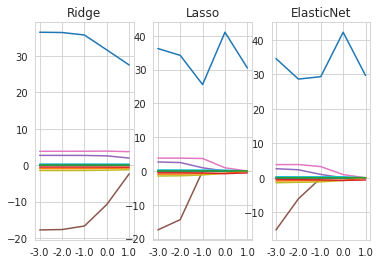

In [7]:
# 시각화
ax1 = plt.subplot(131)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(132)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

ax3 = plt.subplot(133)
plt.semilogx(df_elasticNet.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("ElasticNet")

plt.show()